# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

In this project I will be exploring the companies that IPO'd in the record breaking year of 2021. About 1053 companies IPO'd that year, which was a jump from the 480 of the previous year, also a record year. I will be using kaggles [company ipos (2019 - 2021)](https://www.kaggle.com/datasets/shivamb/company-ipos-2019-2021) dataset. Additionally, I will be collecting more variables from the source of kaggles dataset, [Stock Analysis](https://stockanalysis.com/). Specifically, I will looking at the relationship between SPAC and non SPAC IPOs and how they compare and contrast on multiple spectrums.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV File.

Method: This data, called company ipos (2019-2021), was downloaded programmatically using `opendatasets` from kaggle and saved as a csv file. I want to specifically focus on the year 2021 which was a record breaking year in terms of number of IPOs.

Dataset variables:

*   *ID: Row ID.*
*   *IPO Date: The month, day, and year the company IPO'd.*
*   *Symbol: The company's ticker symbol on the exchange.*
*   *Company Name: Name of IPO company.*
*   *IPO Price: The price set at the companies IPO.*
*   *Current: The current price.*
*   *Return: Return from set price to current price.*

In [1]:
!pip install opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 700.1 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.3 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110687 sha256=793f7ed2c5d2fddf887e0020655efab1e5ded6503e20915deb68ef2189d27852
  Stored in directory: /Users/arsensei99/Library/Caches/pip/wheels/5a/ab/50/e224f599a07faf6d398a8600796012da271b7e5e7f2a3ab2b8
Successfully built kaggle
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
import matplotlib.pyplot as plt
import opendatasets as od
import pandas as pd
import numpy as np
import os

In [3]:
#FILL IN 1st data gathering and loading method
kaggle_dataset = "https://www.kaggle.com/datasets/shivamb/company-ipos-2019-2021"
od.download(kaggle_dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arsensei
Your Kaggle Key: ········


100%|██████████| 38.9k/38.9k [00:00<00:00, 763kB/s]

In [4]:
data_dir = "./company-ipos-2019-2021"
os.listdir(data_dir)

['company_ipo.csv']

In [5]:
kaggle_df = pd.read_csv('company_ipo.csv')
kaggle_df.head()

,ID,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,1,"Dec 21, 2021",NVAC,NorthView Acquisition,$10.00,$10.03,0.30%
1,2,"Dec 21, 2021",LSPR,Larkspur Health Acquisition,$10.00,$9.98,-0.20%
2,3,"Dec 21, 2021",SAGA,Sagaliam Acquisition,$10.00,$9.97,-0.30%
3,4,"Dec 17, 2021",RCAC,Revelstone Capital Acquisition,$10.00,$9.90,-1.00%
4,5,"Dec 17, 2021",APCA,AP Acquisition,$10.00,$10.11,1.10%


#### Dataset 2

Type: CSV File.

Method: This data was downloaded manually from Stock Analysis, a website that collect company IPO data. This is also the source of the kaggle dataset. Here we have access to more variables that could be useful for our analysis.

Dataset variables:

*   *IPO Month: The month company IPO'd.*
*   *IPO Day: The day the company IPO'd.*
*   *IPO Year: The year the company IPO'd.*
*   *Symbol: The company's ticker symbol on the exchange.*
*   *Founded: The year company was founded.*
*   *Industry_Sector: The industry and sector the company is in.*
*   *is SPAC: Was the IPO a special purpose acquisition?*

In [6]:
#FILL IN 2nd data gathering and loading method
ipo_df = pd.read_csv('ipos_2021.csv')
ipo_df.head()

,IPO Month,IPO Day,IPO Year,Symbol,Founded,Industry_Sector,Is SPAC
0,12,30,2021,GMFI,2021.0,Shell Companies - Financials,Yes
1,12,28,2021,WTMA,2021.0,Shell Companies - Financials,Yes
2,12,27,2021,AOGO,2021.0,Shell Companies - Financials,Yes
3,12,22,2021,GDNR,2021.0,Shell Companies - Financials,Yes
4,12,22,2021,NXGL,1997.0,Medical Instruments & Supplies - Healthcare,No


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [7]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [8]:
#FILL IN - Inspecting the dataframe visually
kaggle_df

,ID,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,1,"Dec 21, 2021",NVAC,NorthView Acquisition,$10.00,$10.03,0.30%
1,2,"Dec 21, 2021",LSPR,Larkspur Health Acquisition,$10.00,$9.98,-0.20%
2,3,"Dec 21, 2021",SAGA,Sagaliam Acquisition,$10.00,$9.97,-0.30%
3,4,"Dec 17, 2021",RCAC,Revelstone Capital Acquisition,$10.00,$9.90,-1.00%
4,5,"Dec 17, 2021",APCA,AP Acquisition,$10.00,$10.11,1.10%
...,...,...,...,...,...,...,...
1760,1761,"Jan 17, 2019",RBKB,Rhinebeck Bancorp,$10.00,$10.61,6.10%
1761,1762,"Jan 9, 2019",BCOW,1895 Bancorp of Wisconsin,$10.00,$10.93,9.30%
1762,1763,"Jan 8, 2019",MDJH,MDJM Ltd.,$5.00,$1.91,-61.80%
1763,1764,"Jan 8, 2019",MTC,MMTec,$4.00,$0.85,-78.73%


In [9]:
kaggle_df.sample(20)

,ID,IPO Date,Symbol,Company Name,IPO Price,Current,Return
700,701,"Mar 19, 2021",FNCH,Finch Therapeutics Group,$17.00,$9.50,-44.12%
336,337,"Aug 20, 2021",WAVC,Waverley Capital Acquisition 1,$10.00,$9.71,-2.90%
542,543,"Jun 10, 2021",ZETA,Zeta Global Holdings,$10.00,$8.36,-16.40%
1162,1163,"Nov 13, 2020",DMYI,"dMY Technology Group, Inc. III",$10.00,$10.40,4.00%
1736,1737,"Mar 5, 2019",THCB,Tuscan Holdings,$10.00,$10.00,0.00%
1385,1386,"Jul 31, 2020",ETAC,E.merge Technology Acquisition,$10.00,$9.83,-1.70%
995,996,"Jan 15, 2021",DRVN,Driven Brands Holdings,$22.00,$31.64,43.82%
1483,1484,"May 5, 2020",ROCH,Roth CH Acquisition I,$10.00,$28.90,189.00%
1354,1355,"Aug 18, 2020",STPK,Star Peak Energy Transition,$10.00,$26.61,166.10%
1693,1694,"May 8, 2019",PSN,Parsons,$27.00,$32.90,21.85%


In [10]:
#FILL IN - Inspecting the dataframe programmatically
kaggle_df[kaggle_df['IPO Price'] == '$0.00']

,ID,IPO Date,Symbol,Company Name,IPO Price,Current,Return
89,90,"Nov 15, 2021",ONL,Orion Office REIT,$0.00,$18.96,0.00%
121,122,"Nov 9, 2021",PRM,Perimeter Solutions,$0.00,$12.84,0.00%
123,124,"Nov 8, 2021",LYLT,Loyalty Ventures,$0.00,$30.03,0.00%
128,129,"Nov 5, 2021",TSVT,2seventy bio,$0.00,$30.04,0.00%
143,144,"Nov 4, 2021",KD,Kyndryl Holdings,$0.00,$18.02,0.00%
194,195,"Oct 22, 2021",GET,Getnet Adquirencia E Servicos Para Meios De Pa...,$0.00,$1.17,0.00%
221,222,"Oct 18, 2021",OZ,"Belpointe PREP, LLC",$0.00,$100.04,0.00%
237,238,"Oct 13, 2021",CLST,Catalyst Bancorp,$0.00,$14.05,0.00%
245,246,"Oct 8, 2021",CCSI,Consensus Cloud Solutions,$0.00,$57.05,0.00%
257,258,"Oct 5, 2021",CION,CĪON Investment,$0.00,$12.51,0.00%


In [11]:
kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1765 non-null   int64 
 1   IPO Date      1765 non-null   object
 2   Symbol        1765 non-null   object
 3   Company Name  1765 non-null   object
 4   IPO Price     1765 non-null   object
 5   Current       1765 non-null   object
 6   Return        1765 non-null   object
dtypes: int64(1), object(6)
memory usage: 96.6+ KB


Issue and justification: To start, I focused on the `kaggle_df` dataset. I first displayed the whole dataset for visual assesment and also display a sample of the dataset for indirect assesment. From this, I saw some glaring issues. One of these was the `IPO Price`, `Current`, and `Return` columns, each one had a symbol which is not a problem for a display dataset but is for analysis. Additionally, I noticed that some of the values for `IPO Price` and `Return` were zero. So I then programmatically printed all the rows where `IPO Price` is zero and discovered that in all these cases, `Return` is also zero. Next, by using the `info()` method, we can see that some of the columns are the wrong datatypes, including those mentioned above plus the `IPO Date` column. Finally, this dataset has data from years 2019-2021, when the scope of this analysis is solely focused on the year 2021. Overall the data looks pretty clean but for these few issues.

### Quality Issue 2:

In [12]:
#FILL IN - Inspecting the dataframe visually
ipo_df

,IPO Month,IPO Day,IPO Year,Symbol,Founded,Industry_Sector,Is SPAC
0,12,30,2021,GMFI,2021.0,Shell Companies - Financials,Yes
1,12,28,2021,WTMA,2021.0,Shell Companies - Financials,Yes
2,12,27,2021,AOGO,2021.0,Shell Companies - Financials,Yes
3,12,22,2021,GDNR,2021.0,Shell Companies - Financials,Yes
4,12,22,2021,NXGL,1997.0,Medical Instruments & Supplies - Healthcare,No
...,...,...,...,...,...,...,...
1030,1,6,2021,PPGH,NaN,NaN,NaN
1031,1,6,2021,STPC,NaN,Shell Companies - Financial Services,NaN
1032,1,5,2021,CRU,NaN,NaN,NaN
1033,1,5,2021,BENE,NaN,NaN,NaN


In [13]:
ipo_df.sample(20)

,IPO Month,IPO Day,IPO Year,Symbol,Founded,Industry_Sector,Is SPAC
622,4,9,2021,GLSPT,NaN,NaN,NaN
413,7,16,2021,STVN,1949.0,Medical Instruments & Supplies - Healthcare,No
385,7,27,2021,ALPA,2021.0,Shell Companies - Financials,Yes
628,4,6,2021,ACBA,2020.0,Shell Companies - Financials,Yes
634,3,31,2021,COUR,2012.0,Education & Training Services - Consumer Staples,No
96,11,12,2021,DERM,2014.0,Drug Manufacturers - Specialty & Generic - Hea...,No
229,10,14,2021,TRIS,2021.0,Shell Companies - Financials,Yes
647,3,25,2021,OLK,2004.0,Diagnostics & Research - Healthcare,No
817,2,19,2021,BRPM,2020.0,Shell Companies - Financial Services,NaN
67,11,24,2021,MNTN,2021.0,Shell Companies - Financials,Yes


In [14]:
#FILL IN - Inspecting the dataframe programmatically
ipo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IPO Month        1035 non-null   int64  
 1   IPO Day          1035 non-null   int64  
 2   IPO Year         1035 non-null   int64  
 3   Symbol           1035 non-null   object 
 4   Founded          909 non-null    float64
 5   Industry_Sector  894 non-null    object 
 6   Is SPAC          873 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 56.7+ KB


In [15]:
ipo_df[ipo_df['Is SPAC'].isnull()]

,IPO Month,IPO Day,IPO Year,Symbol,Founded,Industry_Sector,Is SPAC
71,11,23,2021,MAAQ,2021.0,NaN,NaN
73,11,22,2021,LAX,2021.0,NaN,NaN
117,11,10,2021,AFAC,NaN,NaN,NaN
125,11,9,2021,HTAQ,NaN,NaN,NaN
215,10,20,2021,AXH,2021.0,Shell Companies - Financial Services,NaN
...,...,...,...,...,...,...,...
1030,1,6,2021,PPGH,NaN,NaN,NaN
1031,1,6,2021,STPC,NaN,Shell Companies - Financial Services,NaN
1032,1,5,2021,CRU,NaN,NaN,NaN
1033,1,5,2021,BENE,NaN,NaN,NaN


In [16]:
ipo_df[ipo_df.duplicated('Symbol')]

,IPO Month,IPO Day,IPO Year,Symbol,Founded,Industry_Sector,Is SPAC
377,7,29,2021,SWAG,NaN,NaN,NaN


In [17]:
ipo_df[ipo_df['Symbol'] == 'SWAG']

,IPO Month,IPO Day,IPO Year,Symbol,Founded,Industry_Sector,Is SPAC
123,11,9,2021,SWAG,1994.0,Shell Companies - Financials,No
377,7,29,2021,SWAG,NaN,NaN,NaN


Issue and justification: Next, I looked through the `ipos_2021` dataset. Once again I display the dataset for visual assesment and display a sample for indirect assesment. First thing I noticed is that this dataset has more recent dates going to December 30th, whereas the previous only goes up to December 21st which indicates missing data. Secondly, there is a lot of `NaN` values in this dataset and the `info()` proved this to be true. I investigated further by displaying all rows where `Is SPAC` is `NaN` which showed over 160 rows. Furthermore, from the `info()` we see incorrect datatype for some of the columns, including all the dated columns plus the `Founded` column. Further programmatic investigation shows there's one duplicated row with symbol SWAG.

### Tidiness Issue 1:

In [18]:
#FILL IN - Inspecting the dataframe visually
ipo_df

,IPO Month,IPO Day,IPO Year,Symbol,Founded,Industry_Sector,Is SPAC
0,12,30,2021,GMFI,2021.0,Shell Companies - Financials,Yes
1,12,28,2021,WTMA,2021.0,Shell Companies - Financials,Yes
2,12,27,2021,AOGO,2021.0,Shell Companies - Financials,Yes
3,12,22,2021,GDNR,2021.0,Shell Companies - Financials,Yes
4,12,22,2021,NXGL,1997.0,Medical Instruments & Supplies - Healthcare,No
...,...,...,...,...,...,...,...
1030,1,6,2021,PPGH,NaN,NaN,NaN
1031,1,6,2021,STPC,NaN,Shell Companies - Financial Services,NaN
1032,1,5,2021,CRU,NaN,NaN,NaN
1033,1,5,2021,BENE,NaN,NaN,NaN


In [19]:
#FILL IN - Inspecting the dataframe programmatically
ipo_df['Industry_Sector'].value_counts()

Shell Companies - Financials                    406
Biotechnology - Healthcare                      104
Software - Application - Technology              49
Blank Check / SPAC - Blank Check / SPAC          36
Software - Infrastructure - Technology           30
                                               ... 
Specialty Industrial Machinery - Industrials      1
Utilities - Diversified - Utilities               1
Other Industrial Metals & Mining - Materials      1
Other Precious Metals & Mining - Materials        1
Specialty Chemicals - Materials                   1
Name: Industry_Sector, Length: 94, dtype: int64

Issue and justification: The main tidiness issues that I noticed were from the `ipos_2021.csv` dataset. The first issue is in the `Industry_Sector` column where two sperate variables are combined into one. Using the `value_counts()` method, we can see that the industry and sector are connected by a dash in all displayed rows.

### Tidiness Issue 2: 

In [20]:
#FILL IN - Inspecting the dataframe visually
ipo_df.sample(20)

,IPO Month,IPO Day,IPO Year,Symbol,Founded,Industry_Sector,Is SPAC
448,7,1,2021,DRAY,2021.0,Blank Check / SPAC - Blank Check / SPAC,Yes
668,3,23,2021,NBST,2020.0,Shell Companies - Financials,Yes
13,12,16,2021,SHAP,2021.0,Shell Companies - Financials,Yes
327,8,26,2021,RNXT,2012.0,Biotechnology - Healthcare,No
97,11,12,2021,MCAG,2021.0,Shell Companies - Financials,Yes
623,4,9,2021,TPGS,NaN,NaN,NaN
352,8,6,2021,NOVV,2021.0,Shell Companies - Financials,Yes
110,11,10,2021,CINT,1995.0,Software - Infrastructure - Technology,No
1012,1,8,2021,LHC,2020.0,Shell Companies - Financials,No
997,1,12,2021,GPAC,2020.0,Shell Companies - Financials,Yes


In [21]:
#FILL IN - Inspecting the dataframe programmatically
ipo_df.shape

(1035, 7)

In [22]:
ipo_df.columns

Index(['IPO Month', 'IPO Day', 'IPO Year', 'Symbol', 'Founded',
       'Industry_Sector', 'Is SPAC'],
      dtype='object')

In [23]:
ipo_df.index

RangeIndex(start=0, stop=1035, step=1)

Issue and justification: The last tidiness issue that I wish to address is that of the `IPO Month`, `IPO Day`, and `IPO Year` columns. In this case, we have three columns that can be combined into one. This would make it easier when we combine the two datasets, as in `kaggle_df.csv` there is one date column. By using the `shape`, `columns`, and `index` methods we can see all the index, columns, and dimensionality of the dataset.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [24]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
kaggle_copy = kaggle_df.copy()
ipo_copy = ipo_df.copy()

In [25]:
kaggle_copy.head()

,ID,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,1,"Dec 21, 2021",NVAC,NorthView Acquisition,$10.00,$10.03,0.30%
1,2,"Dec 21, 2021",LSPR,Larkspur Health Acquisition,$10.00,$9.98,-0.20%
2,3,"Dec 21, 2021",SAGA,Sagaliam Acquisition,$10.00,$9.97,-0.30%
3,4,"Dec 17, 2021",RCAC,Revelstone Capital Acquisition,$10.00,$9.90,-1.00%
4,5,"Dec 17, 2021",APCA,AP Acquisition,$10.00,$10.11,1.10%


In [26]:
ipo_copy.head()

,IPO Month,IPO Day,IPO Year,Symbol,Founded,Industry_Sector,Is SPAC
0,12,30,2021,GMFI,2021.0,Shell Companies - Financials,Yes
1,12,28,2021,WTMA,2021.0,Shell Companies - Financials,Yes
2,12,27,2021,AOGO,2021.0,Shell Companies - Financials,Yes
3,12,22,2021,GDNR,2021.0,Shell Companies - Financials,Yes
4,12,22,2021,NXGL,1997.0,Medical Instruments & Supplies - Healthcare,No


### **Quality Issue 1: FILL IN**

In [27]:
# FILL IN - Apply the cleaning strategy
# Read in the missing data using pandas
missing_df = pd.read_csv('missing_ipo.csv')
missing_df

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,"Dec 30, 2021",GMFI,Aetherium Acquisition Corp.,$10.00,$10.75,7.50%
1,"Dec 28, 2021",WTMA,Welsbach Technology Metals Acquisition Corp.,$10.00,$10.78,7.80%
2,"Dec 27, 2021",AOGO,Arogo Capital Acquisition Corp.,$10.00,$10.65,6.50%
3,"Dec 22, 2021",GDNR,Gardiner Healthcare Acquisitions Corp.,$10.00,$10.80,8.00%
4,"Dec 22, 2021",NXGL,"NEXGEL, Inc.",$5.50,$1.95,-64.55%
5,"Dec 21, 2021",LSPR,Larkspur Health Acquisition Corp.,$10.00,$22.50,125.00%


In [28]:
# Concatenate missing_df on top of kaggle_copy, ensure the index is reset after
# Drop the ID column of kaggle_copy
kaggle_copy = pd.concat([missing_df, kaggle_copy], ignore_index=True)
kaggle_copy = kaggle_copy.drop('ID', axis=1)

In [29]:
# Convert IPO Price, Current, and Return columns to int type
kaggle_copy['IPO Price'] = pd.to_numeric(kaggle_copy['IPO Price'].str.replace('$', ''), errors='coerce')
kaggle_copy['Current'] = pd.to_numeric(kaggle_copy['Current'].str.replace('$', ''), errors='coerce')
kaggle_copy['Return'] = pd.to_numeric(kaggle_copy['Return'].str.replace('%', ''), errors='coerce')

<ipython-input-29-6716c7cca175>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  kaggle_copy['IPO Price'] = pd.to_numeric(kaggle_copy['IPO Price'].str.replace('$', ''), errors='coerce')
<ipython-input-29-6716c7cca175>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  kaggle_copy['Current'] = pd.to_numeric(kaggle_copy['Current'].str.replace('$', ''), errors='coerce')


In [30]:
# Convert all zero values in IPO Price, and Return columns to NaN
kaggle_copy['IPO Price'] = kaggle_copy['IPO Price'].replace(0, np.nan)
kaggle_copy['Return'] = kaggle_copy['Return'].replace(0, np.nan)

# Drop all these rows with NaN values
kaggle_copy = kaggle_copy.dropna(subset=['IPO Price', 'Return'])

In [31]:
# Convert IPO Date to datetime type
# Remove rows where year is less then 2021
kaggle_copy['IPO Date'] = pd.to_datetime(kaggle_copy['IPO Date'])
kaggle_copy = kaggle_copy[kaggle_copy['IPO Date'].dt.year >= 2021]

In [32]:
# FILL IN - Validate the cleaning was successful
kaggle_copy

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,2021-12-30,GMFI,Aetherium Acquisition Corp.,10.0,10.75,7.50
1,2021-12-28,WTMA,Welsbach Technology Metals Acquisition Corp.,10.0,10.78,7.80
2,2021-12-27,AOGO,Arogo Capital Acquisition Corp.,10.0,10.65,6.50
3,2021-12-22,GDNR,Gardiner Healthcare Acquisitions Corp.,10.0,10.80,8.00
4,2021-12-22,NXGL,"NEXGEL, Inc.",5.5,1.95,-64.55
...,...,...,...,...,...,...
1054,2021-01-06,KAIR,Kairos Acquisition,10.0,9.76,-2.40
1055,2021-01-06,STPC,Star Peak II,10.0,9.87,-1.30
1056,2021-01-05,BENE,Benessere Capital Acquisition,10.0,10.13,1.30
1057,2021-01-05,FVT,Fortress Value Acquisition III,10.0,9.77,-2.30


In [33]:
kaggle_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 0 to 1058
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   IPO Date      1019 non-null   datetime64[ns]
 1   Symbol        1019 non-null   object        
 2   Company Name  1019 non-null   object        
 3   IPO Price     1019 non-null   float64       
 4   Current       1019 non-null   float64       
 5   Return        1019 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 55.7+ KB


Justification: I first collected the missing data that are present in `ipos_df` but not in `kaggle_df`. This was manual retrieved from the [Stock Analysis](https://stockanalysis.com/) website that is the source of the kaggle dataset. Afterwards, I used pandas `concat` method to join `missing_df` to `kaggle_copy`, while I dropped the ID column. Then, I proceeded to convert the three last columns into int datatype. To do this, I replaced the $ and % symboles with empty space and from there used the `to_numeric()` to convert to int type. Next, I simply used the `replace()` method to convert all zero values in the `IPO Price` and `Return` columns to NaN values, then from their, using the `dropna()` method I dropped the rows. Lastly, I converted the `IPO Date` column to datatime type and then shortened the dataframe to onyl include data within the 2021 year, as that is the focus of this analysis.

### **Quality Issue 2: FILL IN**

In [34]:
# FILL IN - Apply the cleaning strategy
# Drop all rows with NaN values, then convert founded column to int type
ipo_copy = ipo_copy.dropna(subset=['Founded', 'Industry_Sector', 'Is SPAC'])
ipo_copy['Founded'] = ipo_copy['Founded'].astype(int)

In [35]:
# Drop duplicate rows in ipo_copy
ipo_copy.drop_duplicates(inplace=True)

In [36]:
# FILL IN - Validate the cleaning was successful
ipo_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 1028
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   IPO Month        857 non-null    int64 
 1   IPO Day          857 non-null    int64 
 2   IPO Year         857 non-null    int64 
 3   Symbol           857 non-null    object
 4   Founded          857 non-null    int64 
 5   Industry_Sector  857 non-null    object
 6   Is SPAC          857 non-null    object
dtypes: int64(4), object(3)
memory usage: 53.6+ KB


In [37]:
ipo_copy[ipo_copy.duplicated('Symbol')]

,IPO Month,IPO Day,IPO Year,Symbol,Founded,Industry_Sector,Is SPAC


Justification: Here, in the the `ipo_copy` dataframe, I drop rows with NaN value inorder to have a more accurate dataframe for analysis. I then convert the `Founded`column to int type as years cannot be floats. Lastly, I used the `drop_duplicate` method to remove any duplicate rows in the dataframe.

### **Tidiness Issue 1: FILL IN**

In [38]:
#FILL IN - Apply the cleaning strategy
# Split Industry_Sector into two columns and drop it
ipo_copy[['Industry', 'Sector']] = ipo_copy['Industry_Sector'].str.extract('(.*) - (.*)')
ipo_copy.drop(['Industry_Sector'], axis=1, inplace=True)

# Realign Is SPAC column
column_to_move = ipo_copy.pop('Is SPAC')
ipo_copy['Is SPAC'] = column_to_move

In [39]:
#FILL IN - Validate the cleaning was successful
ipo_copy.head()

,IPO Month,IPO Day,IPO Year,Symbol,Founded,Industry,Sector,Is SPAC
0,12,30,2021,GMFI,2021,Shell Companies,Financials,Yes
1,12,28,2021,WTMA,2021,Shell Companies,Financials,Yes
2,12,27,2021,AOGO,2021,Shell Companies,Financials,Yes
3,12,22,2021,GDNR,2021,Shell Companies,Financials,Yes
4,12,22,2021,NXGL,1997,Medical Instruments & Supplies,Healthcare,No


Justification: The first tidiness issues was with the `Industry_Sector` that contained multiple variables are stored in one column. As the variables were separated by a dash, I used the `str.extract()` to extract the two variables, industry and sector, and store them in separated columns.

### **Tidiness Issue 2: FILL IN**

In [40]:
#FILL IN - Apply the cleaning strategy
# Convert the date columns to string type to combine into a single variable
columns_to_convert = ['IPO Month', 'IPO Day', 'IPO Year']
ipo_copy[columns_to_convert] = ipo_copy[columns_to_convert].astype(str)
ipo_copy['IPO Date'] = ipo_copy['IPO Month'] + ' - ' + ipo_copy['IPO Day'] + ' - ' + ipo_copy['IPO Year']

# Realign the IPO Date column to the front and drop the other date columns
column_to_move = ipo_copy.pop('IPO Date')
ipo_copy.drop(columns=['IPO Year', 'IPO Month', 'IPO Day'], inplace=True)
ipo_copy.insert(0, 'IPO Date', column_to_move)

# Convert IPO Date to datetime data type
ipo_copy['IPO Date'] = pd.to_datetime(ipo_copy['IPO Date'])

In [41]:
#FILL IN - Validate the cleaning was successful
ipo_copy.head()

,IPO Date,Symbol,Founded,Industry,Sector,Is SPAC
0,2021-12-30,GMFI,2021,Shell Companies,Financials,Yes
1,2021-12-28,WTMA,2021,Shell Companies,Financials,Yes
2,2021-12-27,AOGO,2021,Shell Companies,Financials,Yes
3,2021-12-22,GDNR,2021,Shell Companies,Financials,Yes
4,2021-12-22,NXGL,1997,Medical Instruments & Supplies,Healthcare,No


In [42]:
ipo_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 1028
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   IPO Date  857 non-null    datetime64[ns]
 1   Symbol    857 non-null    object        
 2   Founded   857 non-null    int64         
 3   Industry  857 non-null    object        
 4   Sector    857 non-null    object        
 5   Is SPAC   857 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 46.9+ KB


Justification: The second tidiness issue addresses the multiplicity of the Date columns: `IPO Month`, `IPO Day`, and `IPO Year`. Here we see a single observational unit is stored in multiple tables, so I combined these three columns into a single `IPO Date` column. This we'll also make it easier and cleaner when we combine the two dataframes into one.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [43]:
#FILL IN - Remove unnecessary variables and combine datasets
# Merge kaggle_copy to ipo_copy on Symbol and IPO Date
master_df = pd.merge(kaggle_copy, ipo_copy, on=['Symbol', 'IPO Date'])
master_df.head()

,IPO Date,Symbol,Company Name,IPO Price,Current,Return,Founded,Industry,Sector,Is SPAC
0,2021-12-30,GMFI,Aetherium Acquisition Corp.,10.0,10.75,7.50,2021,Shell Companies,Financials,Yes
1,2021-12-28,WTMA,Welsbach Technology Metals Acquisition Corp.,10.0,10.78,7.80,2021,Shell Companies,Financials,Yes
2,2021-12-27,AOGO,Arogo Capital Acquisition Corp.,10.0,10.65,6.50,2021,Shell Companies,Financials,Yes
3,2021-12-22,GDNR,Gardiner Healthcare Acquisitions Corp.,10.0,10.80,8.00,2021,Shell Companies,Financials,Yes
4,2021-12-22,NXGL,"NEXGEL, Inc.",5.5,1.95,-64.55,1997,Medical Instruments & Supplies,Healthcare,No


In [44]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 818
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   IPO Date      819 non-null    datetime64[ns]
 1   Symbol        819 non-null    object        
 2   Company Name  819 non-null    object        
 3   IPO Price     819 non-null    float64       
 4   Current       819 non-null    float64       
 5   Return        819 non-null    float64       
 6   Founded       819 non-null    int64         
 7   Industry      819 non-null    object        
 8   Sector        819 non-null    object        
 9   Is SPAC       819 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 70.4+ KB


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [45]:
#FILL IN - saving data
master_df.to_csv('2021_ipos_cleaned.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* How does SPAC IPOs compare to non SPAC in terms of IPO price, and the founding year?

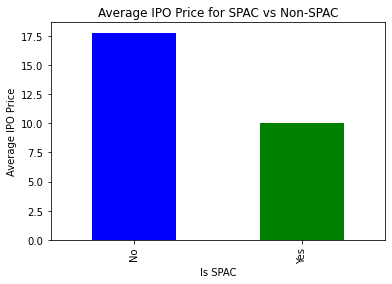

In [46]:
#Visual 1 - FILL IN
# Group by Is SPAC and calculate the average IPO price
average_prices = master_df.groupby('Is SPAC')['IPO Price'].mean()
colors = ['blue', 'green']
# Create a bar plot
average_prices.plot(kind='bar', color=colors)
plt.xlabel('Is SPAC')
plt.ylabel('Average IPO Price')
plt.title('Average IPO Price for SPAC vs Non-SPAC')
plt.show();

*Answer to research question:* When comparing the IPO price of SPAC vs Non-SPAC companies, we see that Non-SPAC companies have a higher IPO price than SPAC companies.

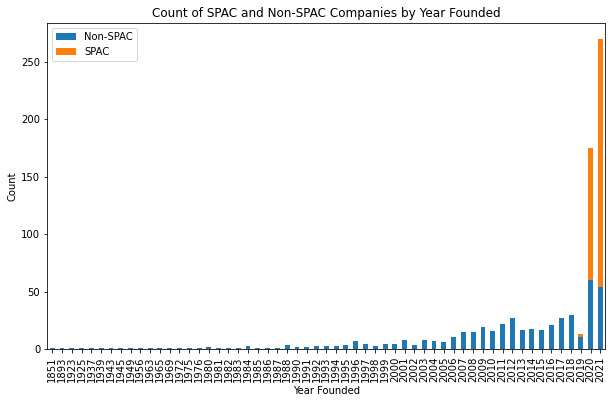

In [47]:
#Visual 2 - FILL IN
# Group the data by 'Founded' and 'Is SPAC' and count the occurrences
grouped_counts = master_df.groupby(['Founded', 'Is SPAC']).size().unstack(fill_value=0)
# Create a grouped bar chart
ax = grouped_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
# Set labels and title and add a legend
plt.xlabel('Year Founded')
plt.ylabel('Count')
plt.title('Count of SPAC and Non-SPAC Companies by Year Founded')
plt.legend(['Non-SPAC', 'SPAC'])
plt.show()

*Answer to research question:* When looking at SPAC vs Non-SPAC based on year founded, we can see a sharp increase in SPAC companies from the year 2019 to 2021. 

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time to complet the project, I would spend some time collect additional data regarding the companies funding rounds. Specifically, number of rounds between founding and IPO date, and funding raised for each round. Additionally, I would want to analyze the average return based on company industry and sector. Overall, there's so much that can be learned and analyzed in this topic of startups and IPOs.